In [1]:
#We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, 
#these images are classified in one of the 10 categories shown below
#Each image is 28 x 28 pixel in dimension

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
keras.backend.backend()

'tensorflow'

In [5]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
#To see data in array format

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]

9

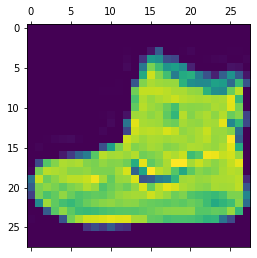

In [10]:
#To see data in matrix format

plt.matshow(X_train[0])

In [11]:
#The label belongs to corresponding category in the MNIST list

y_train[0]

9

In [12]:
#Normalize training data before training the neural network
#We are training the data from 0-255 t0 all into 0-1

X_train = X_train/255

In [13]:
X_test = X_test/255

In [16]:
#To check individual image how it looks

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
#Now build the Sequential Model and add layers into it

from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [19]:
#Create a neural network model by using model = Sequential()
#Now create a neural network with 1-input layer(faltten),2-hidden layer(dense),3-output layer(activation)
#Flatten is converting 2D-array into 1D-array 
#Dense layer is the hidden layer
#softmax function is distibuting set of numbers into a probability distribution of available classsification classes

model = Sequential() #neural network model
model.add(Flatten(input_shape=[28, 28])) #input layer 28 x 28 =784
model.add(Dense(100, activation="relu")) #hidden layer 100
model.add(Dense(10, activation="softmax")) #output layer 10[our count =10]

In [20]:
#After model is built we can see the summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Now we need to compile the model
#when you are training your neural network optimizer is an alogrithm helps in adjusting the weights of edges during training
#metrics helps us in choosing what kind of metrics to be used during training

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
#Now your model is ready for training
#If you want to perform 5 iteration use epochs =5 in model.fit after y_train with ,separator

model.fit(X_train, y_train)

Epoch 1/1
60000/60000 [==============================] - 10s 170us/step - loss: 0.5078 - accuracy: 0.8225


In [23]:
#Shows accuracy score of 84.35%. The first parameter is loss 0.45%

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[0.44900779719352724, 0.843500018119812]

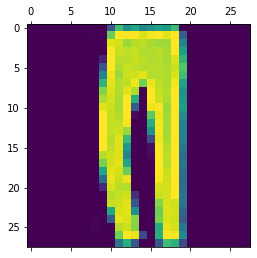

In [48]:
plt.matshow(X_test[2])

In [27]:
X_test.shape

(10000, 28, 28)

In [49]:
yp = model.predict(X_test)

In [50]:
yp[2]

array([1.5696267e-05, 9.9994409e-01, 2.0839509e-06, 1.3670658e-05,
       2.3655832e-05, 2.1121140e-08, 6.1747278e-07, 4.6686406e-08,
       2.4825900e-07, 1.5444122e-09], dtype=float32)

In [51]:
np.argmax(yp[2])

1

In [31]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [41]:
class_labels[np.argmax(yp[2])]

'Trouser'